<a href="https://colab.research.google.com/github/BlackCurrantDS/DeepLearning/blob/main/IDL_Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References- 

https://medium.com/@ml.at.berkeley/tricking-neural-networks-create-your-own-adversarial-examples-a61eb7620fd8

https://adversarial-ml-tutorial.org/adversarial_examples/

https://harvard-iacs.github.io/2019-CS109B/lecture/lab21/AdversarialNN/

https://adversarial-ml-tutorial.org/adversarial_examples/

https://medium.com/analytics-vidhya/implementing-adversarial-attacks-and-defenses-in-keras-tensorflow-2-0-cab6120c5715

Targeted - adding carefully nosie despite looking same to human
non-targated- find any input which tricks model

In [190]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [191]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [192]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [193]:
train_images.shape

(60000, 28, 28)

In [194]:
len(train_labels)

60000

In [195]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [196]:
test_images.shape

(10000, 28, 28)

In [197]:
len(test_labels)

10000

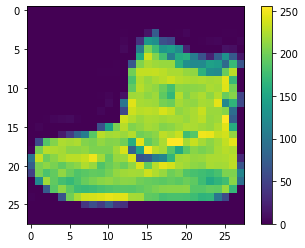

In [198]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [199]:
train_images = train_images / 255.0

test_images = test_images / 255.0

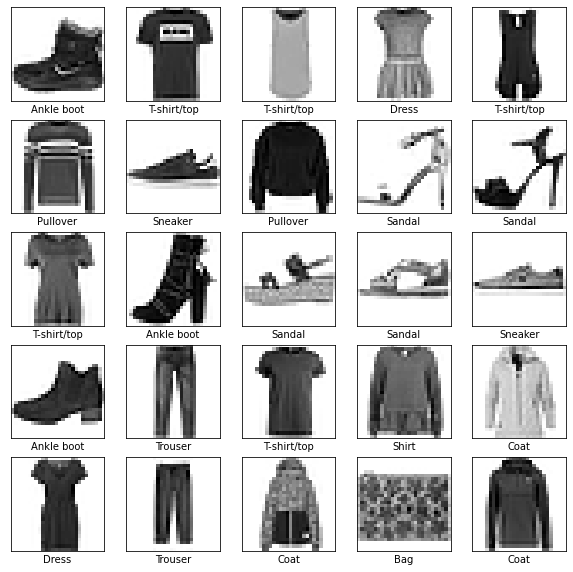

In [200]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [201]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [202]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [203]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6223 - accuracy: 0.7860
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3794 - accuracy: 0.8621
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3414 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3157 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2921 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2775 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2649 - accuracy: 0.9019
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2516 - accuracy: 0.9061
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2460 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.231

In [204]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3357 - accuracy: 0.8821

Test accuracy: 0.882099986076355


Ref - https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

In [205]:
first_image = test_images[0]
label=class_names[test_labels[0]]
predictions= model.predict(test_images)
image_probs = np.argmax(predictions[0])

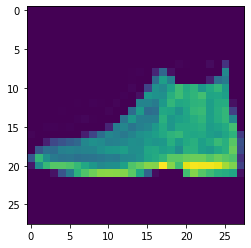

In [206]:
plt.figure()
plt.imshow(first_image) # To change [-1, 1] to [0,1]
plt.show()

In [207]:
label

'Ankle boot'

In [208]:
image_probs

9

In [209]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    print("prediction is", prediction)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [210]:
in_image = tf.Variable(first_image.reshape((1, 28, 28)).astype(np.float32) /255.0)

In [211]:
print(test_labels[0])

9


prediction is tf.Tensor(
[[-2.431198  -8.885595  -4.7011523 -3.049007  -5.177651   0.9513685
  -2.8293722 -4.2670865 -4.814791  -7.4604135]], shape=(1, 10), dtype=float32)
perturbations is tf.Tensor(
[[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
   -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]
  [ 1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
   -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.]
  [ 1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1.
   -1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1.]
  [-1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.
   -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.]
  [-1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.
   -1.  1. -1. -1. -1.  1.  1. -1. -1.  1. -1.]
  [ 1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
   -1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1.]
  [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
   -1. -1. -1. 

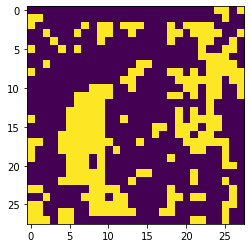

In [212]:
perturbations = create_adversarial_pattern(in_image, test_labels[0])
print("perturbations is",perturbations)
plt.imshow(perturbations[0]*0.5+0.5) # To change [-1, 1] to [0,1]

In [213]:
def display_images(i):
  predictions= model.predict(i)
  label = np.argmax(predictions[0])
  plt.figure()
  plt.imshow(i[0]*0.5+0.5)
  plt.title('{}'.format(label))
  plt.show()

In [214]:
adv_x = first_image + 0.1*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)

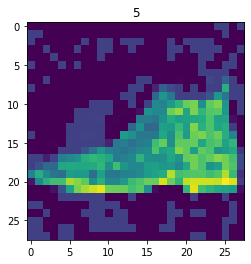

In [215]:
display_images(adv_x)

Its difficult to tell if its show or a sandle

ToDO-- Do it for the entire batch

Targated Atatck

In [216]:
#every image prediction is same

In [217]:
p = model(adv_x, training=False)

In [218]:
originalLoss = -loss_object(tf.convert_to_tensor([9]),p)

In [219]:
targetLoss = loss_object(tf.convert_to_tensor([2]),p)

In [220]:
totalLoss = originalLoss + targetLoss

In [221]:
#instead of maximizing the loss of the true label, we maximize the loss of the loss of the true label and also minimize the loss for the alternative label.

SyntaxError: ignored

In [222]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def create_adversarial_pattern_targated(input_image, input_label,my_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)
    alt_loss = -loss_object(my_label,prediction)
    total_los = loss+alt_loss

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(total_los, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [223]:
test_labels[1]

2

In [224]:
perturbations_targated = create_adversarial_pattern_targated(in_image, test_labels[0],test_labels[1])


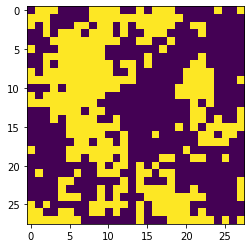

In [225]:
plt.imshow(perturbations_targated[0]*0.5+0.5) # To change [-1, 1] to [0,1]

In [226]:
def display_images(i):
  predictions= model.predict(i)
  label = np.argmax(predictions[0])
  plt.figure()
  plt.imshow(i[0]*0.5+0.5)
  plt.title('{}'.format(class_names[label]))
  plt.show()

In [227]:
adv_x_targated = first_image + 0.15*perturbations_targated
adv_x_targated = tf.clip_by_value(adv_x_targated, -1, 1)

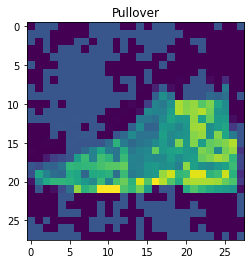

In [228]:
display_images(adv_x_targated)

It is predicting 2. But will it predict anoter image also 2?

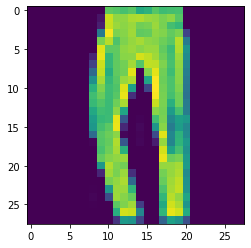

In [229]:
plt.imshow(test_images[5])

In [230]:
adv_x_targated = test_images[5] + 0.12*perturbations_targated #but it wroked for .12 and above value
adv_x_targated = tf.clip_by_value(adv_x_targated, -1, 1)

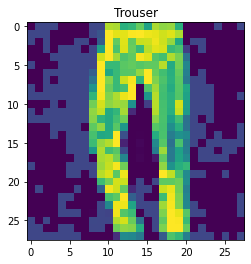

In [231]:
display_images(adv_x_targated)

Adversarial Training

In [248]:
adverserial_training_images = tf.add(train_images, 0.5*perturbations)
adverserial_training_images = tf.clip_by_value(adverserial_training_images, -1, 1)

In [249]:
adverserial_training_images=adverserial_training_images.numpy()

In [250]:
adverserial_training_images.shape

(60000, 28, 28)

In [251]:
adverserial_test_images = tf.add(test_images, 0.5*perturbations)
adverserial_test_images = tf.clip_by_value(adverserial_test_images, -1, 1)

In [252]:
adverserial_test_images=adverserial_test_images.numpy()

In [253]:
adverserial_test_images.shape

(10000, 28, 28)

In [254]:
#now try to predict

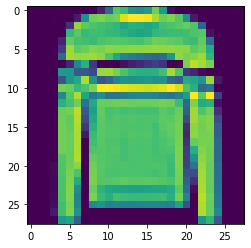

In [255]:
plt.imshow(train_images[5])

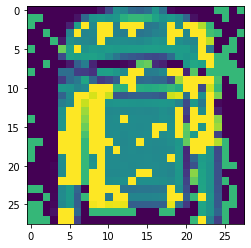

In [256]:
plt.imshow(adverserial_training_images[5])
i = adverserial_training_images[5]

In [257]:
class_names[train_labels[5]]

'Pullover'

In [258]:
in_image = tf.Variable(adverserial_training_images[5].reshape((1, 28, 28)).astype(np.float32))

In [259]:
predictions= model.predict(np.expand_dims(adverserial_training_images[5],0)) #np.expand_dims(test_images[0],0)

In [260]:
label = np.argmax(predictions[0])
class_names[label]

'Sandal'